In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

**Q1)**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data= pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-5-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

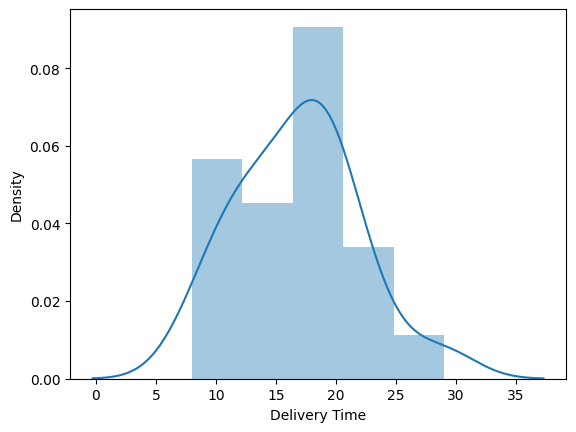

In [5]:
sns.distplot(data['Delivery Time'])

<ipython-input-6-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

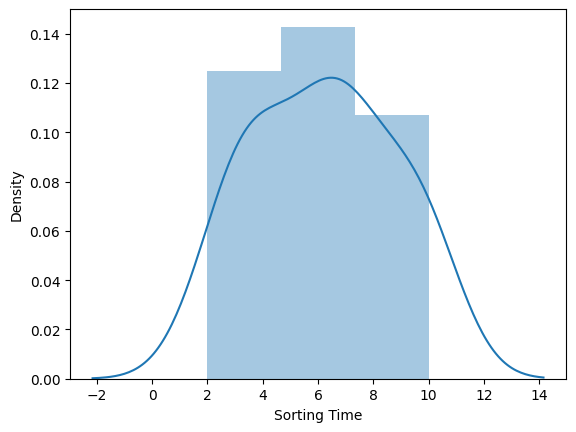

In [6]:
sns.distplot(data['Sorting Time'])

**Correlation**

In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

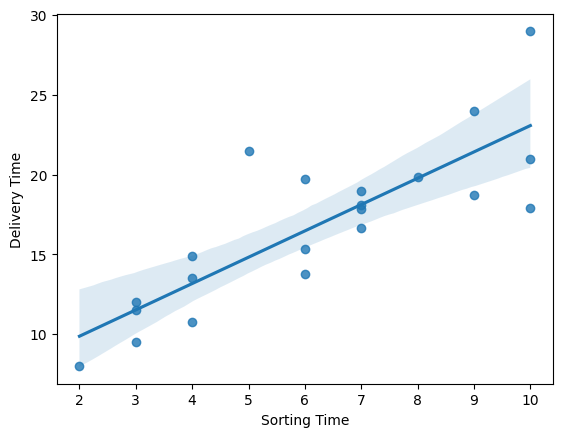

In [8]:
sns.regplot(x=data["Sorting Time"],y=data["Delivery Time"])

# **Model Buliding**

a) No  Transformation

In [9]:
model = smf.ols("Q('Delivery Time')~Q('Sorting Time')", data=data).fit()

**Model testing**

In [10]:
model.params

Intercept            6.582734
Q('Sorting Time')    1.649020
dtype: float64

In [11]:
model.tvalues,model.pvalues

(Intercept            3.823349
 Q('Sorting Time')    6.387447
 dtype: float64,
 Intercept            0.001147
 Q('Sorting Time')    0.000004
 dtype: float64)

In [12]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        06:59:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.722      3.823      0.001       2.979      10.186
Q('Sorting Time')     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) Log Transformation

In [14]:
Log_Sorting_time = np.log(data['Sorting Time'])

# Build the linear regression model with the transformed predictor variable
model_log= smf.ols("Q('Delivery Time') ~ Log_Sorting_time", data=data).fit()

In [15]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.64e-06
Time:                        06:59:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
Log_Sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b)Exponentail transformation

In [16]:
data['log_Delivery_Time'] = np.log(data['Delivery Time'])
model_exp = smf.ols("log_Delivery_Time ~ Q('Sorting Time')", data=data).fit()

In [17]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.59e-06
Time:                        06:59:23   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1214      0.103     20.601      0.000       1.906       2.337
Q('Sorting Time')     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c) Quadratic Transformation

In [18]:
model_quad = smf.ols("Q('Delivery Time') ~ Q('Sorting Time') + np.power(Q('Sorting Time'), 2)", data=data).fit()

In [19]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.39e-05
Time:                        06:59:23   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.5222      4.160      0.847      0.408      -5.217      12.261
Q('Sorting Time')                  2.8130      1.461      1.926      0.070      -0.256       5.882
np.power(Q('Sorting Time'), 2)    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d) Cubic Transformation

In [20]:
model_cubic = smf.ols("Q('Delivery Time') ~ Q('Sorting Time') + np.power(Q('Sorting Time'), 2) + np.power(Q('Sorting Time'), 3)", data=data).fit()

In [21]:
model_cubic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     13.44
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           9.59e-05
Time:                        06:59:23   Log-Likelihood:                -50.633
No. Observations:                  21   AIC:                             109.3
Df Residuals:                      17   BIC:                             113.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -4.1582     10.987     -0.378      0.710     -27.338      19.021
Q('Sorting Time')                  7.5025      6.370      1.178      0.255      -5.937      20.942
np.power(Q('Sorting Time'), 2)    -0.9253      1.106     -0.837      0.414      -3.258       1.407
np.power(Q('Sorting Time'), 3)     0.0445      0.059      0.757      0.460      -0.079       0.168
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.428
Skew:                           0.630   Prob(JB):                        0.490
Kurtosis:                       3.204   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
rsquared_values= pd.Series([model_cubic.rsquared,model_quad.rsquared,model_log.rsquared,model.rsquared,model_exp.rsquared])

In [23]:
Data= pd.DataFrame(rsquared_values,columns=["Rsquared_values"])
Data

,Rsquared_values
0,0.703432
1,0.693440
2,0.695443
3,0.682271
4,0.710948


Since exponentail transformation gives best Rsquared Value we can use it for Model prediction.

# **Model Prediction**

In [24]:
newdata = pd.Series([3, 5, 6, 8], name='Sorting Time')
newdata_log = np.log(newdata)
newdata_log

0    1.098612
1    1.609438
2    1.791759
3    2.079442
Name: Sorting Time, dtype: float64

In [25]:
predictions = np.exp(model_exp.predict({"Sorting Time": newdata}))
predictions

0    11.450423
1    14.141728
2    15.716034
3    19.409927
dtype: float64

**Q2)**

In [26]:
from google.colab import files
uploaded= files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [27]:
salary=pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-29-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

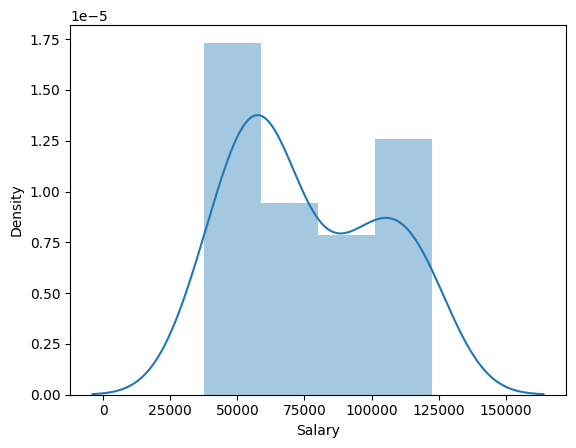

In [29]:
sns.distplot(salary['Salary'])

<ipython-input-30-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

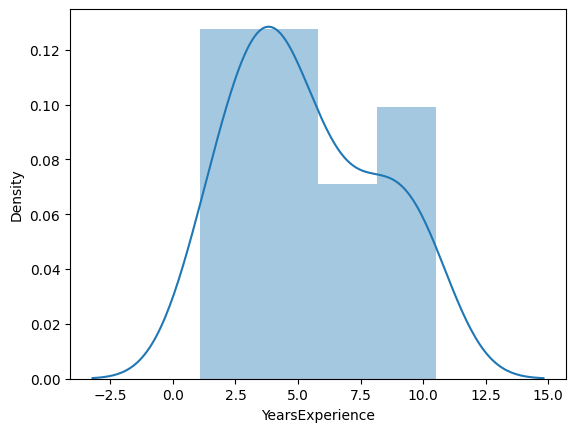

In [30]:
sns.distplot(salary['YearsExperience'])

In [31]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

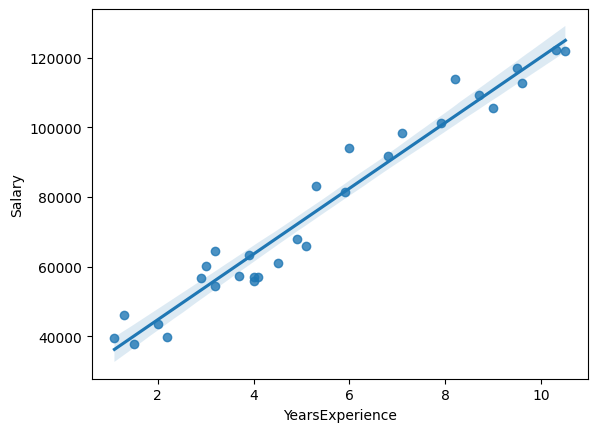

In [32]:
sns.regplot(x=salary["YearsExperience"],y=salary["Salary"])

# **Model Buliding**

a) with no transformations

In [33]:
model2= smf.ols("Salary~YearsExperience",data=salary).fit()
model2

**Model Testing**

In [34]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
model2.tvalues,model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [36]:
model2.rsquared,model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

b) Log transformation

In [42]:
Log_YearsExp = np.log(salary['YearsExperience'])

# Build the linear regression model with the transformed predictor variable
model2_log= smf.ols("Salary ~ Log_YearsExp", data=salary).fit()

In [43]:
model2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.25e-13
Time:                        07:44:07   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
Log_YearsExp  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c)Exponentail Transformation

In [44]:
salary['log_Salary'] = np.log(salary['Salary'])
model2_exp = smf.ols("log_Salary ~ YearsExperience", data=salary).fit()

In [45]:
model2_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           7.03e-18
Time:                        07:47:51   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c)Quadratic Transformation

In [46]:
model2_quad = smf.ols("Salary ~ YearsExperience + np.power(YearsExperience, 2)", data=salary).fit()

In [47]:
model2_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           3.59e-19
Time:                        07:50:50   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience               9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
np.power(YearsExperience, 2)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d)Cubic Transformation

In [48]:
model2_cubic=smf.ols("Salary~YearsExperience + np.power(YearsExperience,2)+ np.power(YearsExperience,3)",data=salary).fit()

In [49]:
model2_cubic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     229.4
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.11e-19
Time:                        07:53:27   Log-Likelihood:                -298.93
No. Observations:                  30   AIC:                             605.9
Df Residuals:                      26   BIC:                             611.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     3.886e+04   7214.747      5.387      0.000     2.4e+04    5.37e+04
YearsExperience               -718.7084   4892.111     -0.147      0.884   -1.08e+04    9337.171
np.power(YearsExperience, 2)  2099.3519    968.355      2.168      0.040     108.869    4089.835
np.power(YearsExperience, 3)  -122.9154     56.520     -2.175      0.039    -239.093      -6.737
==============================================================================
Omnibus:                        2.261   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.849
Skew:                           0.470   Prob(JB):                        0.397
Kurtosis:                       2.228   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
rsquared_values= pd.Series([model2_cubic.rsquared,model2_quad.rsquared,model2_log.rsquared,model2.rsquared,model2_exp.rsquared])

In [51]:
Salary_new = pd.DataFrame(rsquared_values,columns=["Rsquared_values"])
Salary_new

,Rsquared_values
0,0.963597
1,0.956975
2,0.853889
3,0.956957
4,0.931967


Since the Cubic transformation gives highest rsquared value we can use it for Model Prediction

# **Model Prediction**

In [60]:
Years= pd.DataFrame({"YearsExperience" :[3,4,5.1,5.2,10]})
Years

,YearsExperience
0,3.0
1,4.0
2,5.1
3,5.2
4,10.0


In [61]:
model2_cubic.predict(Years)

0     52282.397937
1     61711.282817
2     73496.950434
3     74609.374145
4    118695.768000
dtype: float64